In [67]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt
import glob 


In [68]:
def show_image(images, title=None):
    plt.imshow(cv.cvtColor(images, cv.COLOR_BGR2RGB))
    plt.xticks([]), plt.yticks([])
    plt.title(title)
    plt.show()

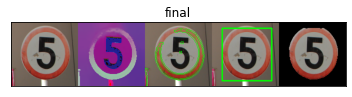

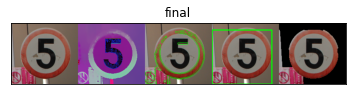

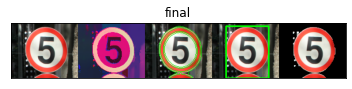

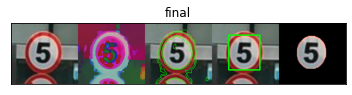

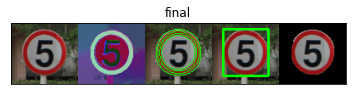

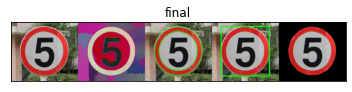

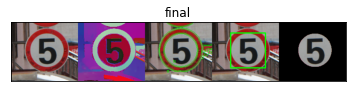

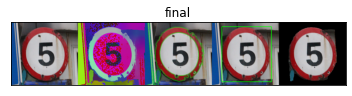

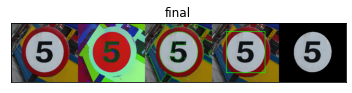

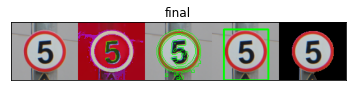

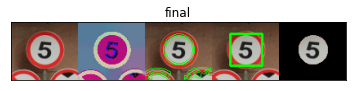

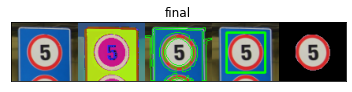

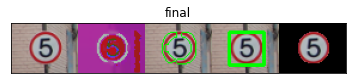

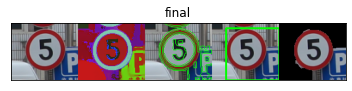

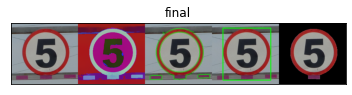

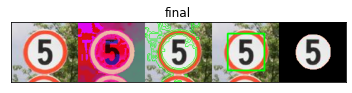

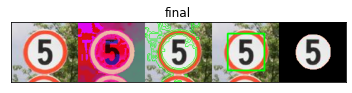

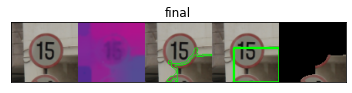

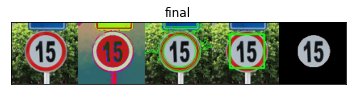

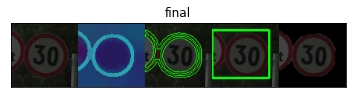

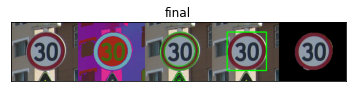

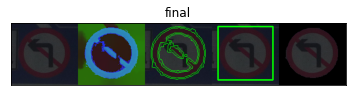

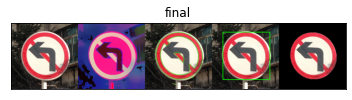

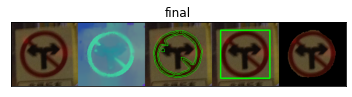

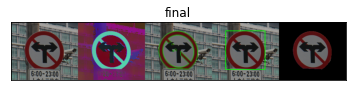

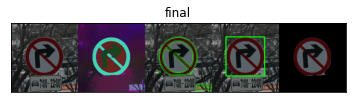

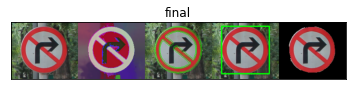

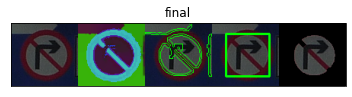

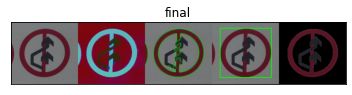

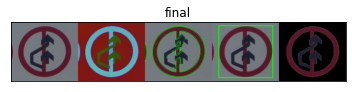

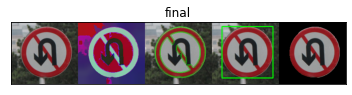

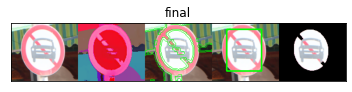

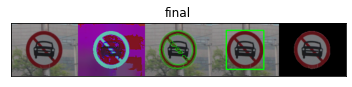

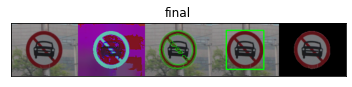

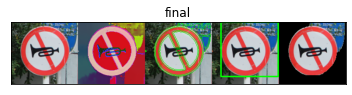

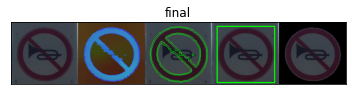

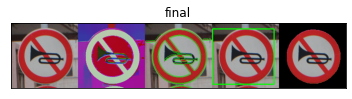

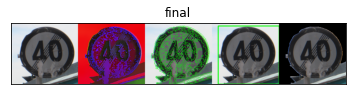

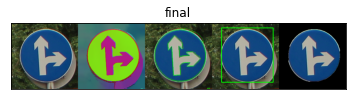

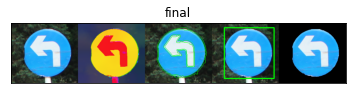

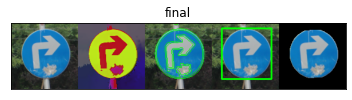

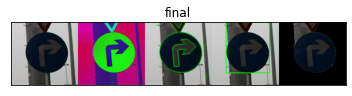

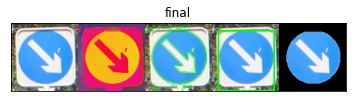

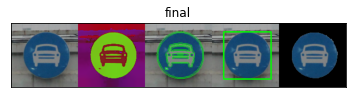

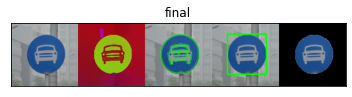

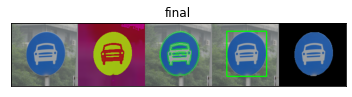

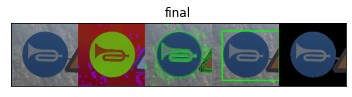

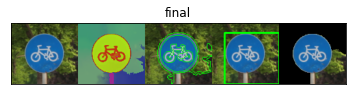

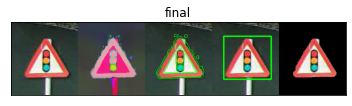

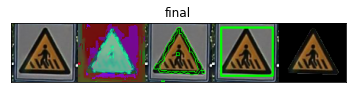

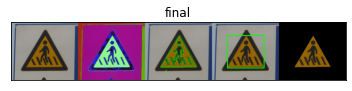

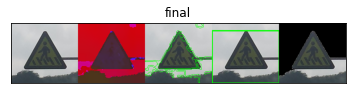

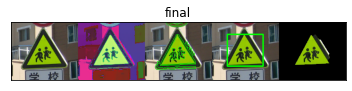

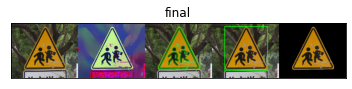

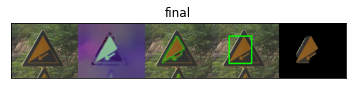

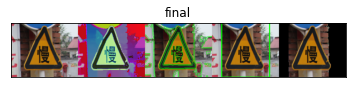

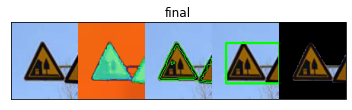

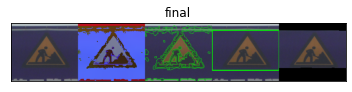

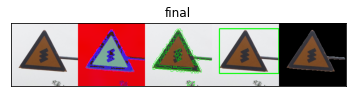

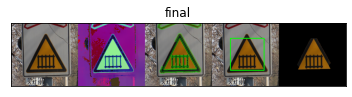

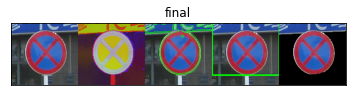

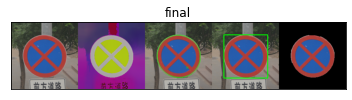

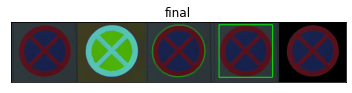

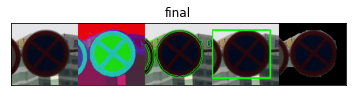

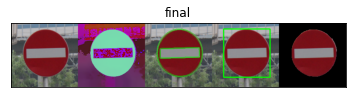

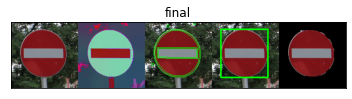

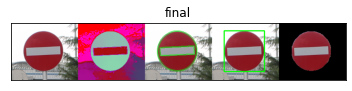

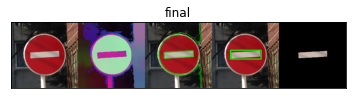

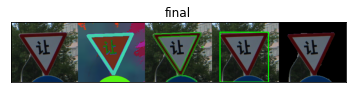

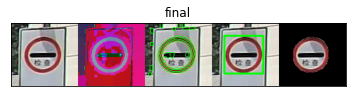

total time of running the script : 39.35570216178894 seconds 
average of 0.5622243165969849 to segment each image


In [121]:
import time

start_time = time.time()

path_read = (r'C:\Users\thive\Desktop\MINI PROJECT\1.Project\Traffic_Sign_Image\*.*')
img_number = 0

for file in glob.glob(path_read):

    #set parameters    
    cv.setRNGSeed(0)
    number_of_iterations = 20

    #import original image
    original_image = cv.imread(file)

    #get height and width of original image
    height, width, _ = original_image.shape
    mask = np.zeros((height, width), np.uint8)
   
    #convert original image to hsv format
    hsvImage = cv.cvtColor(original_image, cv.COLOR_RGB2HSV_FULL)

    #apply mean shift filtering to highlight out the tonality of the image and reduce noise
    mean_img = cv.pyrMeanShiftFiltering(hsvImage,16,64,10)    
    
    #convert mean_img to gray scale format
    gray_image = cv.cvtColor(mean_img, cv.COLOR_RGB2GRAY)

    #threshold the image using otsu in order to carry out contour detection
    ret ,thresh = cv.threshold(gray_image, np.mean(gray_image), 155, cv.THRESH_OTSU)
   
    #Use Canny to detect edges
    edges = cv.dilate(cv.Canny(thresh,100,255),None)
       
    #Use OpenCV findContours 
    contours, hierarchy = cv.findContours(edges , cv.RETR_CCOMP, cv.CHAIN_APPROX_SIMPLE)
    contours_image = cv.drawContours(original_image.copy(), contours, -1, (0, 255, 0), 1)
       
    #retrive biggest contour
    c = max(contours,key = cv.contourArea)

    #set bounding reactangle
    x,y,w,h = cv.boundingRect(c)
    rect_value = cv.rectangle(original_image.copy() ,(x,y),(x+w,y+h),(0,255,0),2)
      
    #Define boundary rectangle containing the foreground object
    boundary_rectangle = (int(x),int(y),int(w),int(h),)

    #GrabCut initialized with a rectangle
    #Initialize mask image
    # Arrays used by the algorithm internally
    background_model = np.zeros((1, 65), np.float64)
    foreground_model = np.zeros((1, 65), np.float64)

    #set grabcut parameters
    cv.grabCut(
        img=original_image,
        mask=mask,
        rect=boundary_rectangle,
        bgdModel=background_model,
        fgdModel=foreground_model,
        iterCount=number_of_iterations,
        mode=cv.GC_INIT_WITH_RECT,
    )

    #set grabcut mask
    grabcut_mask = np.where((mask == cv.GC_PR_BGD) | (mask == cv.GC_BGD), 0, 1).astype("uint8")

    #segment the image using grabcut
    segmented_image = original_image.copy() * grabcut_mask[:, :, np.newaxis]
        	
    #write segmented images to folder   
    cv.imwrite('C:/Users/thive/Desktop/MINI PROJECT/1.Project/70-segemnted/' + str(img_number) + '.png', segmented_image)
    horizontalAppendedImg = np.hstack((original_image,mean_img, contours_image,rect_value,segmented_image))
    show_image( horizontalAppendedImg , "final")  


total_time = (time.time() - start_time)
average = (total_time/70)      
print("total time of running the script : %s seconds " %total_time )
print("average of %s to segment each image" %average)
